In [1]:
%load_ext autoreload
%autoreload 2

from simulation import Simulations
from bandits import StationaryBandit, NonStationaryBandit
from agents import (
    EGreedyAgent, 
    WeightedAgent, 
    OptimisticAgent, 
    UCBAgent, 
    GradientAgent, 
    ThompsonSamplingAgent, 
    SlidingWindowUCBAgent,
    GPKernelAgent,
    EXP3Agent
)

***

# EGreedy


# ε-Greedy Algorithm Overview

The ε-greedy algorithm is a fundamental strategy used in reinforcement learning to balance the trade-off between exploration and exploitation. This method allows an agent to choose randomly with a probability of ε (exploration) and choose the best-known action with a probability of 1-ε (exploitation). The parameter ε, a value between 0 and 1, dictates the level of exploration versus exploitation.

## Key Concepts

- **Exploration**: Discovering new knowledge about the environment.
- **Exploitation**: Utilizing the current knowledge to maximize rewards.

## The ε-Greedy Algorithm

The decision process in ε-greedy is governed by the following rule:

1. With probability ε, select a random action $a$.
2. With probability $1 - ε$, select the action $a^*$ that has the highest estimated value.

### Mathematical Representation

Let $Q(a)$ be the current estimate of the action value of action $a$. At each time step $t$, the agent selects the action based on the ε-greedy policy:

$$
A_t = 
\begin{cases} 
\text{random action}, & \text{with probability } \epsilon \\
\arg\max_a Q(a), & \text{with probability } 1 - \epsilon 
\end{cases}
$$

### Updating the Action-Value Estimate

After taking action $A_t$ and observing the reward $R_{t+1}$, the action-value estimate $Q(A_t)$ is updated using the following rule, where $\alpha$ is the learning rate:

$$
Q(A_t) \leftarrow Q(A_t) + \alpha [R_{t+1} - Q(A_t)]
$$

This update rule is a form of incremental implementation of the sample-average method used for estimating action values.

## Advantages and Disadvantages

### Advantages

- Simple implementation.
- Balances exploration and exploitation effectively with the right ε.

### Disadvantages

- Choosing the right ε is crucial; too high can lead to excessive random actions, while too low can prevent adequate exploration.
- Does not adapt over time; the rate of exploration is constant regardless of the learning progress.

## Applications

The ε-greedy algorithm is widely applied in various domains, including but not limited to:
- Multi-armed bandit problems.
- Online recommendation systems.
- Adaptive routing in networks.

The simplicity and effectiveness of the ε-greedy algorithm make it a popular choice for initial exploration-exploitation strategy in reinforcement learning projects.


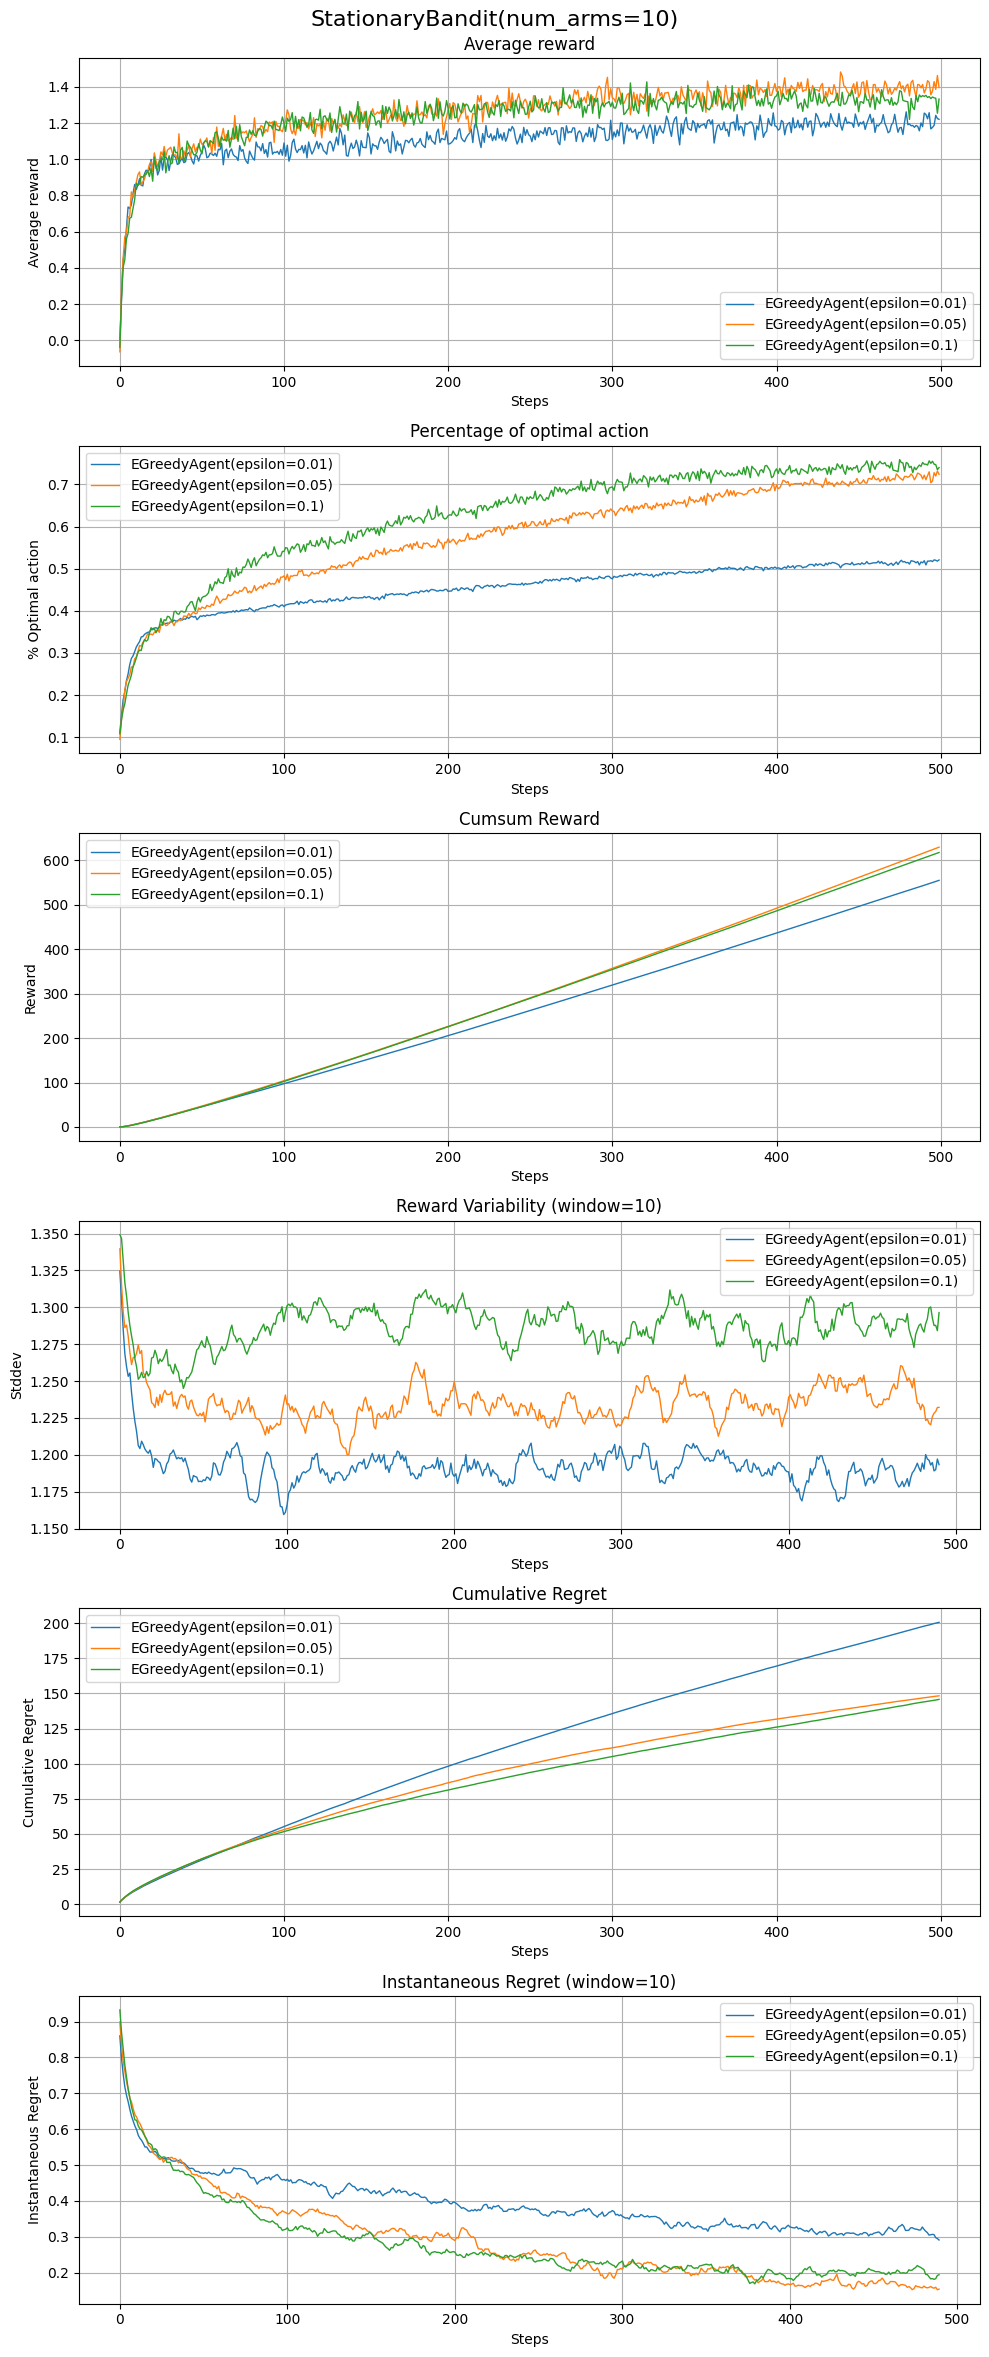

In [25]:
sim_configs = {
    'runs': 1000,
    'steps': 500,
    'arms': 10,
    'bandit': StationaryBandit,
    'bandit_args': {},
    'agents': [
        {
            'agent': EGreedyAgent,
            'args': {'epsilon': .01}
        },
        {
            'agent': EGreedyAgent,
            'args': {'epsilon': .05}
        },
        {
            'agent': EGreedyAgent,
            'args': {'epsilon': .1}
        },
    ]
}

sim = Simulations(**sim_configs)
sim.run()
sim.visualise()

***

# Weighted Average Update Method for Multi-Armed Bandits

The Weighted Average Update Method, often used in the context of the Multi-Armed Bandit (MAB) problem, is a strategy for balancing exploration and exploitation. In the MAB problem, an agent chooses from multiple options (arms) with unknown payout distributions to maximize its total reward over time. The Weighted Average Update Method updates the estimated value of each arm based on the rewards received, influencing future choices towards more rewarding arms.

## The Algorithm

The method updates the value estimate for each arm based on the observed rewards. It assigns more weight to recent rewards to adapt to changing environments or non-stationary reward distributions.

### Notation

- $n_a(t)$: The number of times arm $a$ has been pulled up to time $t$.
- $Q_t(a)$: The estimated value of arm $a$ at time $t$.
- $R_t$: The reward received after pulling an arm at time $t$.
- $\alpha$: The step-size parameter which determines how much the estimates are updated.

### Initialization

1. Initialize $Q_t(a) = 0$ for all $a$.
2. Initialize $n_a(t) = 0$ for all $a$.

### Update Rule

After observing the reward $R_t$ from arm $a$, the estimates are updated as follows:

$$
Q_{t+1}(a) = Q_t(a) + \alpha \cdot (R_t - Q_t(a))
$$

This equation updates the estimated value $Q_t(a)$ towards the observed reward $R_t$, with $\alpha$ controlling the learning rate. A smaller $\alpha$ makes the learning slower but more stable, whereas a larger $\alpha$ allows for faster adaptation to changes in the reward distribution.

## Explanation of the Equation

The update rule is a form of exponential smoothing where recent rewards have more influence on the estimate than older ones. This method is particularly useful in environments where the properties of the arms may change over time or when the initial estimates of the arm's values are uncertain.

- **Exploration vs. Exploitation**: Balancing between exploring new arms to find potentially higher rewards and exploiting arms that are known to provide good rewards is a key challenge. The weighted average method inherently focuses on exploitation but can be combined with exploration strategies, such as $\epsilon$-greedy, where with probability $\epsilon$ a random arm is chosen, and with probability $1-\epsilon$, the arm with the highest estimated value is chosen.

- **Adaptivity**: By adjusting $\alpha$, the algorithm can be made more adaptive to changes in the environment. A constant $\alpha$ gives equal weight to all rewards, whereas a decreasing $\alpha$ over time can help in stabilizing the estimates after sufficient exploration.

- **Bias-Variance Tradeoff**: The choice of $\alpha$ affects the bias and variance of the estimate. A high $\alpha$ can lead to high variance in estimates with low bias, and a low $\alpha$ can lead to low variance but high bias.

## Conclusion

The Weighted Average Update Method is a foundational technique in solving the Multi-Armed Bandit problem, balancing between exploration and exploitation to maximize rewards. By tuning parameters like $\alpha$, one can adapt the learning process to the specifics of their application, such as PPC campaign optimization in a dynamic bidding environment.


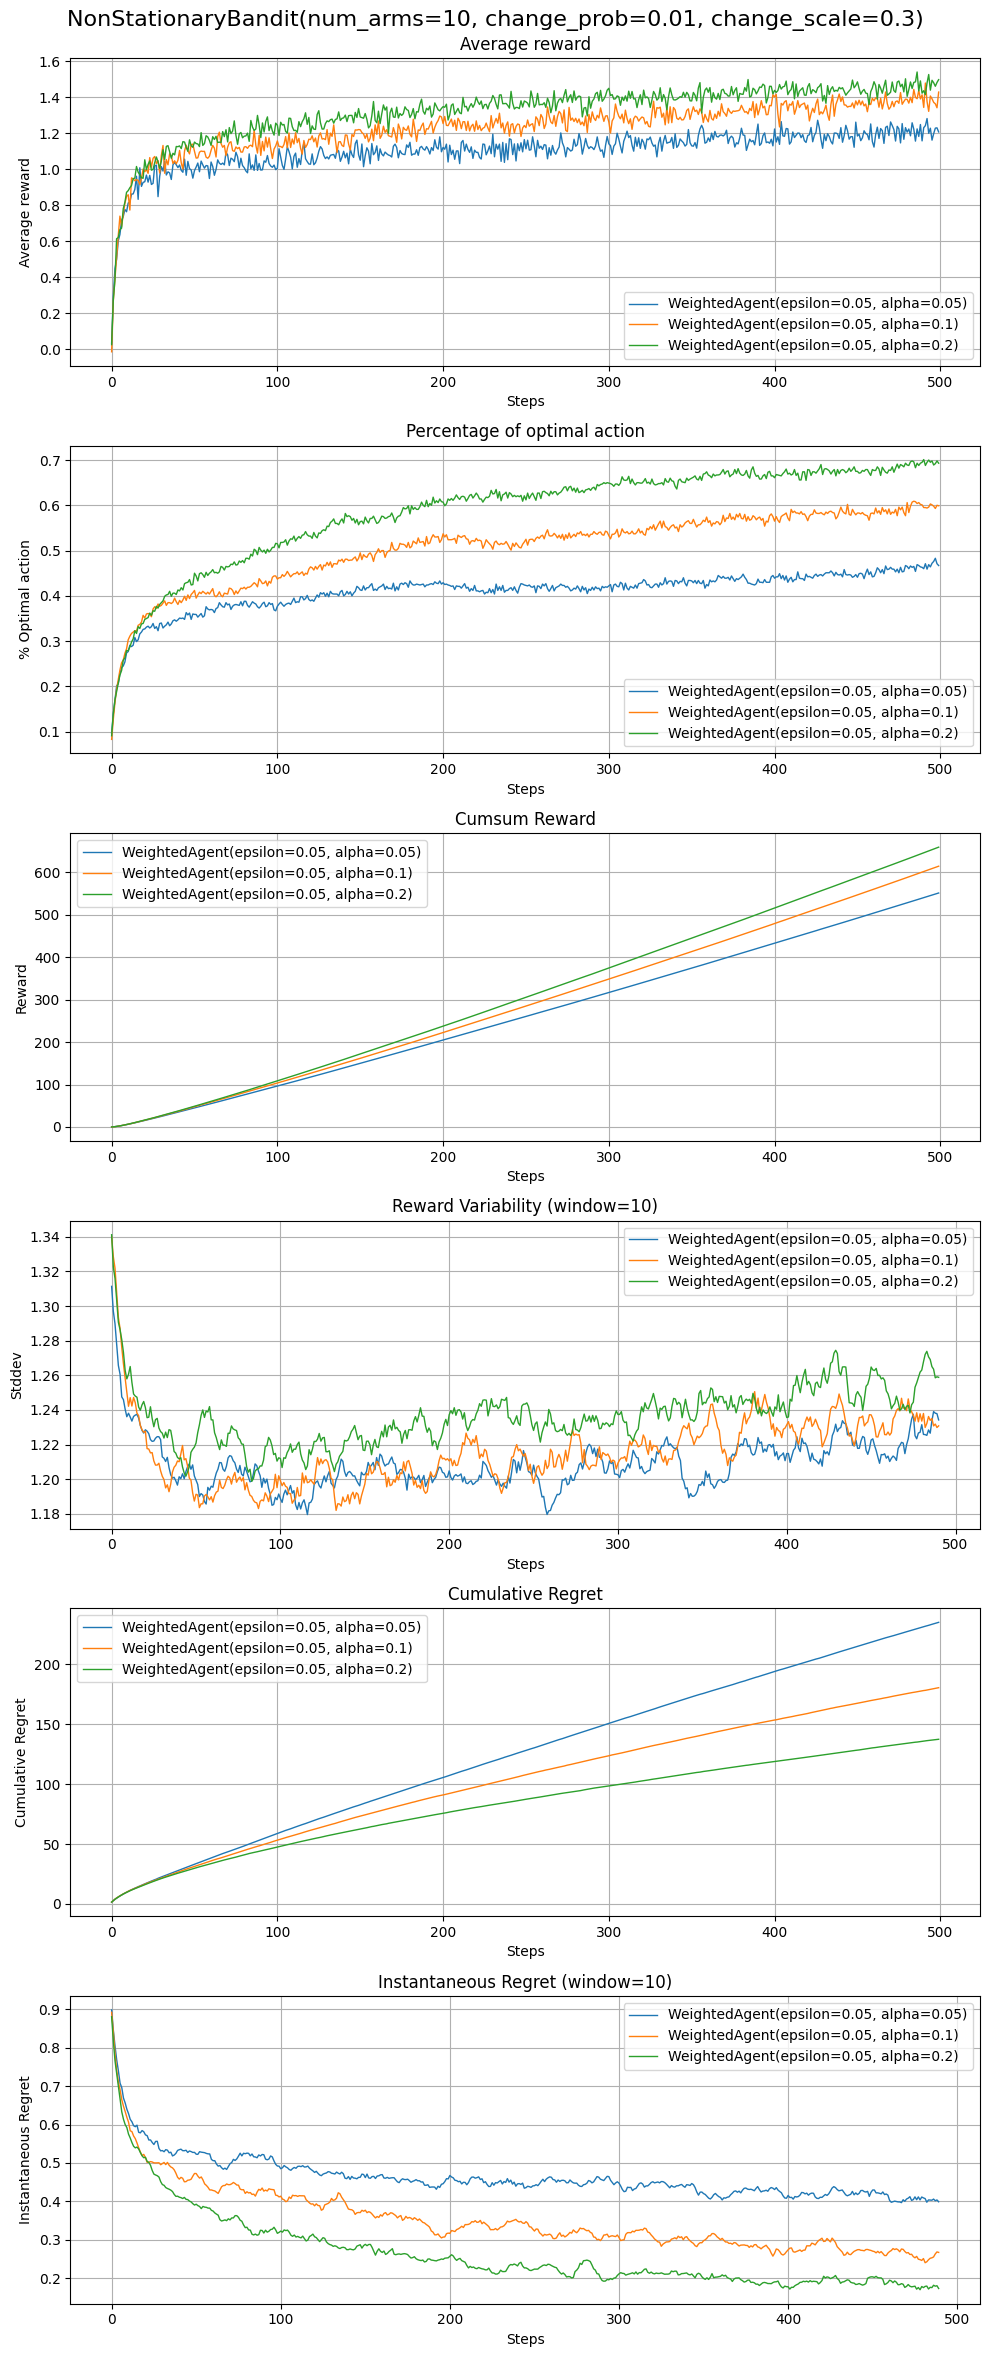

In [27]:
sim_configs = {
    'runs': 1000,
    'steps': 500,
    'arms': 10,
    'bandit': NonStationaryBandit,
    'bandit_args': {'change_prob': 0.01, 'change_scale': 0.3},
    'agents': [
        {
            'agent': WeightedAgent,
            'args': {'epsilon': .05, 'alpha': .05}
        },
        {
            'agent': WeightedAgent,
            'args': {'epsilon': .05, 'alpha': .1}
        },
        {
            'agent': WeightedAgent,
            'args': {'epsilon': .05, 'alpha': .2}
        },
    ]
}

sim = Simulations(**sim_configs)
sim.run()
sim.visualise()

***

# Optimistic Initial Values Algorithm for Multi-Armed Bandits

The Optimistic Initial Values algorithm is a simple yet effective approach to solving the Multi-Armed Bandit (MAB) problem, emphasizing the role of initial expectations in driving exploration. By starting with high initial estimates for the rewards of each arm, the algorithm naturally encourages exploration of all arms before converging on the most rewarding options.

## The Algorithm

This approach modifies the way we initialize the value estimates of each arm. Rather than starting with neutral or pessimistic values, we begin with optimistically high values. This initial optimism encourages the algorithm to explore different arms, reducing the likelihood of prematurely converging on suboptimal choices.

### Notation

- $Q_t(a)$: The estimated value of arm $a$ at time $t$.
- $n_a(t)$: The number of times arm $a$ has been pulled up to time $t$.
- $R_t$: The reward received after pulling an arm at time $t$.
- $Q_0(a)$: The optimistic initial value set for arm $a$.

### Initialization

1. Initialize $Q_t(a) = Q_0(a)$ for all $a$, where $Q_0(a)$ is chosen to be optimistically high.
2. Initialize $n_a(t) = 0$ for all $a$.

### Update Rule

After observing the reward $R_t$ from arm $a$, the estimates are updated using the simple average or an incremental formula similar to the Weighted Average Update Method:

For a simple average update:

$$
Q_{t+1}(a) = \frac{Q_t(a) \cdot n_a(t) + R_t}{n_a(t) + 1}
$$

For an incremental update (where $\alpha$ is the step-size parameter):

$$
Q_{t+1}(a) = Q_t(a) + \frac{1}{n_a(t)} \cdot (R_t - Q_t(a))
$$

### How It Works

- **Initial Exploration**: The optimistic initial values compel the algorithm to explore each arm until the estimated value is adjusted to reflect the true average reward. This strategy is particularly effective in environments where the exploration cost is low or the reward variance is high.

- **Balancing Exploration and Exploitation**: Once the algorithm explores an arm enough to accurately estimate its value, it naturally shifts focus to other, less-explored arms with still-optimistically high estimates. This process continues until all arms are sufficiently explored and the best arms are exploited more frequently.

- **Adaptation to Stationary and Non-Stationary Environments**: While primarily beneficial in stationary environments, this method can also be adapted to non-stationary environments by resetting the optimistic values periodically to re-encourage exploration.

## Conclusion

The Optimistic Initial Values algorithm provides a straightforward mechanism to encourage exploration in the Multi-Armed Bandit problem. By leveraging optimism in the initial phase, it ensures a more thorough exploration of available options, which can be crucial for applications like PPC campaign optimization, where discovering the most effective strategies early can lead to significantly better long-term outcomes.


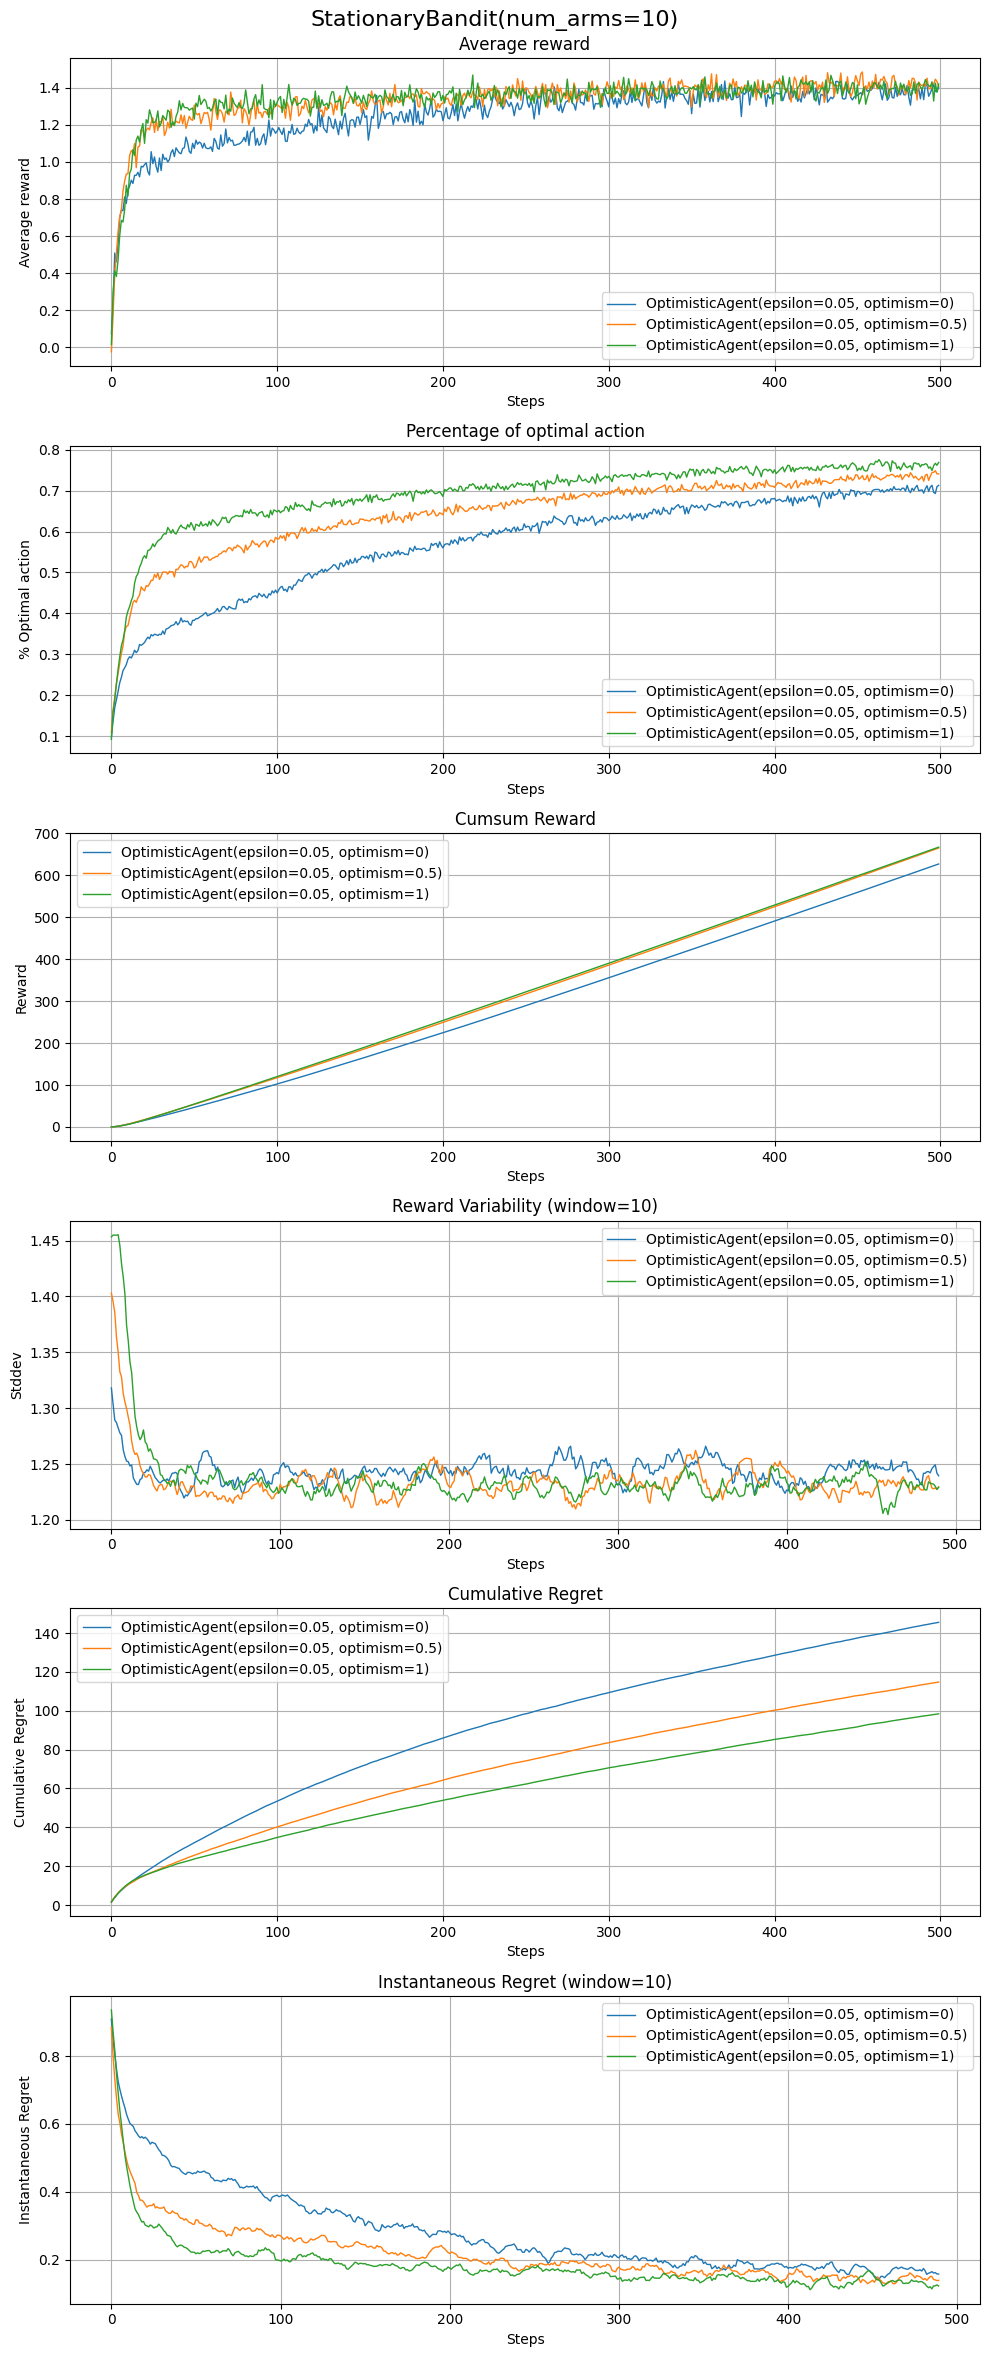

In [28]:
sim_configs = {
    'runs': 1000,
    'steps': 500,
    'arms': 10,
    'bandit': StationaryBandit,
    'bandit_args': {},
    'agents': [
        {
            'agent': OptimisticAgent,
            'args': {'epsilon': .05, 'optimism': 0}
        },
        {
            'agent': OptimisticAgent,
            'args': {'epsilon': .05, 'optimism': 0.5}
        },
        {
            'agent': OptimisticAgent,
            'args': {'epsilon': .05, 'optimism': 1}
        },
    ]
}

sim = Simulations(**sim_configs)
sim.run()
sim.visualise()

***

# Upper Confidence Bound (UCB) Algorithm for Multi-Armed Bandits

The Upper Confidence Bound (UCB) algorithm is a strategy for solving the Multi-Armed Bandit (MAB) problem that focuses on balancing exploration and exploitation by using the uncertainty in the estimate of each arm's value. Unlike methods that rely on fixed exploration rates or optimistic initial values, UCB adjusts its exploration dynamically based on how much it knows about each arm.

## The Algorithm

UCB selects arms based on a confidence interval around the estimated rewards, favoring arms with higher upper bounds. This approach ensures that arms are explored proportional to their potential for being optimal, reducing the overall number of suboptimal choices.

### Notation

- $n_a(t)$: The number of times arm $a$ has been pulled up to time $t$.
- $Q_t(a)$: The estimated value of arm $a$ at time $t$.
- $R_t$: The reward received after pulling an arm at time $t$.
- $t$: The current timestep.
- $c$: A constant that controls the degree of exploration. Higher values of $c$ encourage more exploration.

### Initialization

1. Initialize $Q_t(a) = 0$ for all $a$.
2. Initialize $n_a(t) = 0$ for all $a$.

### Selection Rule

At each time $t$, select the arm $a$ that maximizes the following:

$$
Q_t(a) + c \sqrt{\frac{2 \ln t}{n_a(t)}}
$$

Where:
- The first term, $Q_t(a)$, represents the exploitation part, favoring arms with high average rewards.
- The second term, $c \sqrt{\frac{2 \ln t}{n_a(t)}}$, represents the exploration part, favoring arms that have been pulled less often or have higher uncertainty.

### Update Rule

After pulling arm $a$ and observing reward $R_t$, update the estimates as follows:

1. Increment $n_a(t)$ by 1.
2. Update $Q_t(a)$ using the incremental formula:

$$
Q_{t+1}(a) = Q_t(a) + \frac{1}{n_a(t)}(R_t - Q_t(a))
$$

## Explanation of the Algorithm

- **Dynamic Exploration**: The exploration term decreases as $n_a(t)$ increases, meaning that each arm is explored less as we become more confident in its estimate. This leads to a natural balance between exploring uncertain arms and exploiting known high-reward arms.

- **Adaptivity**: The UCB algorithm adapts its exploration-exploitation balance based on the observed rewards and the number of times each arm has been pulled, making it effective in both stationary and non-stationary environments.

- **Efficiency**: By considering the logarithm of the timestep, $t$, the exploration term slowly decreases over time, ensuring that all arms are explored, but the total number of exploratory pulls is controlled, leading to efficient learning.

## Conclusion

The Upper Confidence Bound (UCB) algorithm provides a robust method for solving the MAB problem by dynamically balancing exploration and exploitation based on the confidence intervals of the estimated rewards. This makes it particularly suitable for applications like PPC campaign optimization, where understanding the variability in ad performance is crucial for maximizing returns on investment.


G:\My Drive\Python\bandits\agents.py:298: RuntimeWarning: invalid value encountered in multiply
  log_term = math.log(self.timestep + 1)


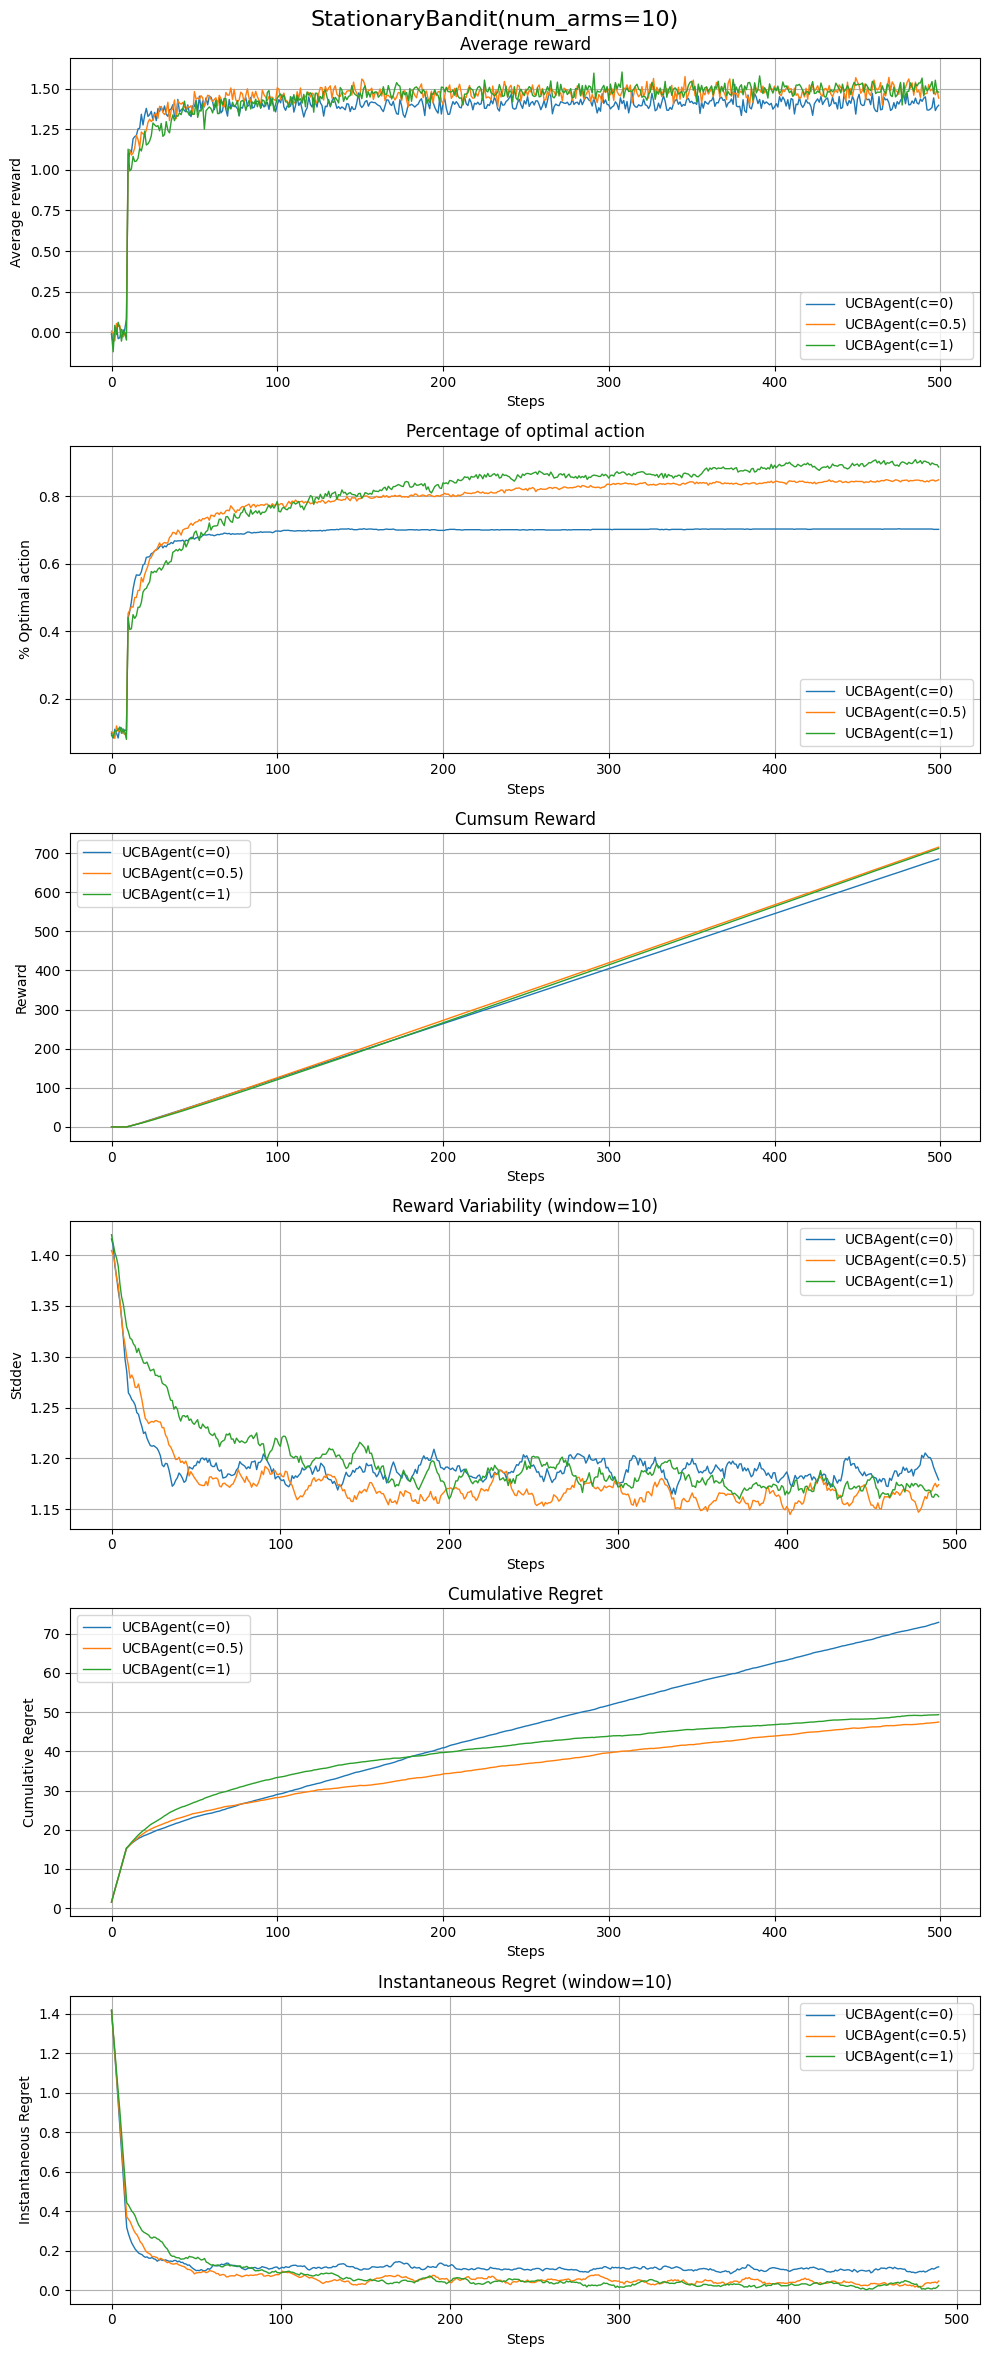

In [29]:
sim_configs = {
    'runs': 1000,
    'steps': 500,
    'arms': 10,
    'bandit': StationaryBandit,
    'bandit_args': {},
    'agents': [
        {
            'agent': UCBAgent,
            'args': {'epsilon': .05, 'c': 0}
        },
        {
            'agent': UCBAgent,
            'args': {'epsilon': .05, 'c': 0.5}
        },
        {
            'agent': UCBAgent,
            'args': {'epsilon': .05, 'c': 1}
        },
    ]
}

sim = Simulations(**sim_configs)
sim.run()
sim.visualise()

***

# Gradient Bandit Algorithm for Multi-Armed Bandits

The Gradient Bandit Algorithm is a reinforcement learning method used in the Multi-Armed Bandit (MAB) problem. Unlike value-based methods that estimate rewards for each action, the Gradient Bandit Algorithm focuses on learning a preference for each action and uses these preferences to probabilistically select actions. This approach can be particularly advantageous in environments where the action space is large or when actions have similar values, making it hard to distinguish between them based solely on estimated rewards.

## The Algorithm

The core idea behind the Gradient Bandit Algorithm is to adjust the preferences of actions based on the received reward and a baseline, usually the average reward. Actions that result in higher than average rewards increase in preference, while those with lower rewards decrease.

### Notation

- $H_t(a)$: The preference for action $a$ at time $t$.
- $\pi_t(a)$: The probability of taking action $a$ at time $t$, which is determined by a softmax distribution over the preferences.
- $R_t$: The reward received at time $t$.
- $\bar{R}_t$: The average reward up to time $t$.
- $\alpha$: The step-size parameter which determines how much preferences are updated.

### Preferences and Action Selection

Actions are selected according to a softmax distribution over the preferences:

$$
\pi_t(a) = \frac{\exp(H_t(a))}{\sum_{b=1}^{K} \exp(H_t(b))}
$$

where $K$ is the number of actions (or arms in the bandit problem).

### Reward Baseline

The reward baseline $\bar{R}_t$ is typically the average of all the rewards received up to time $t$:

$$
\bar{R}_t = \frac{1}{t} \sum_{i=1}^{t} R_i
$$

### Preference Update Rule

After taking action $a$ at time $t$ and observing reward $R_t$, the preferences are updated as follows:

$$
H_{t+1}(a) = H_t(a) + \alpha(R_t - \bar{R}_t)(1 - \pi_t(a)), \text{ for the taken action}
$$

and for all other actions $b \neq a$:

$$
H_{t+1}(b) = H_t(b) - \alpha(R_t - \bar{R}_t)\pi_t(b)
$$

This update rule increases the preference for actions that yield higher than average rewards and decreases it for those that don't, with the adjustment being proportional to the difference between the received reward and the average reward.

## Explanation of the Algorithm

- **Dynamic Exploration and Exploitation**: By adjusting preferences based on the relative success of actions, the algorithm dynamically balances exploration and exploitation. Actions leading to higher rewards become more likely to be chosen, while the probabilistic selection ensures ongoing exploration.
- **Adaptivity to Changing Environments**: The use of a reward baseline and relative preference adjustments allow the algorithm to adapt to changing environments, making it suitable for non-stationary problems like PPC campaign optimization.
- **Efficiency in Large Action Spaces**: The softmax action selection can be particularly effective in scenarios with many similar actions, as it allows for a gradient-based exploration that is more nuanced than random exploration or epsilon-greedy strategies.

## Conclusion

The Gradient Bandit Algorithm offers a robust framework for action selection in environments where the goal is to learn preferences based on rewards relative to a baseline. By focusing on preference adjustments rather than direct action value estimates, it provides a powerful mechanism for both exploration and exploitation, particularly in complex or dynamic environments such as those found in PPC campaign optimization.


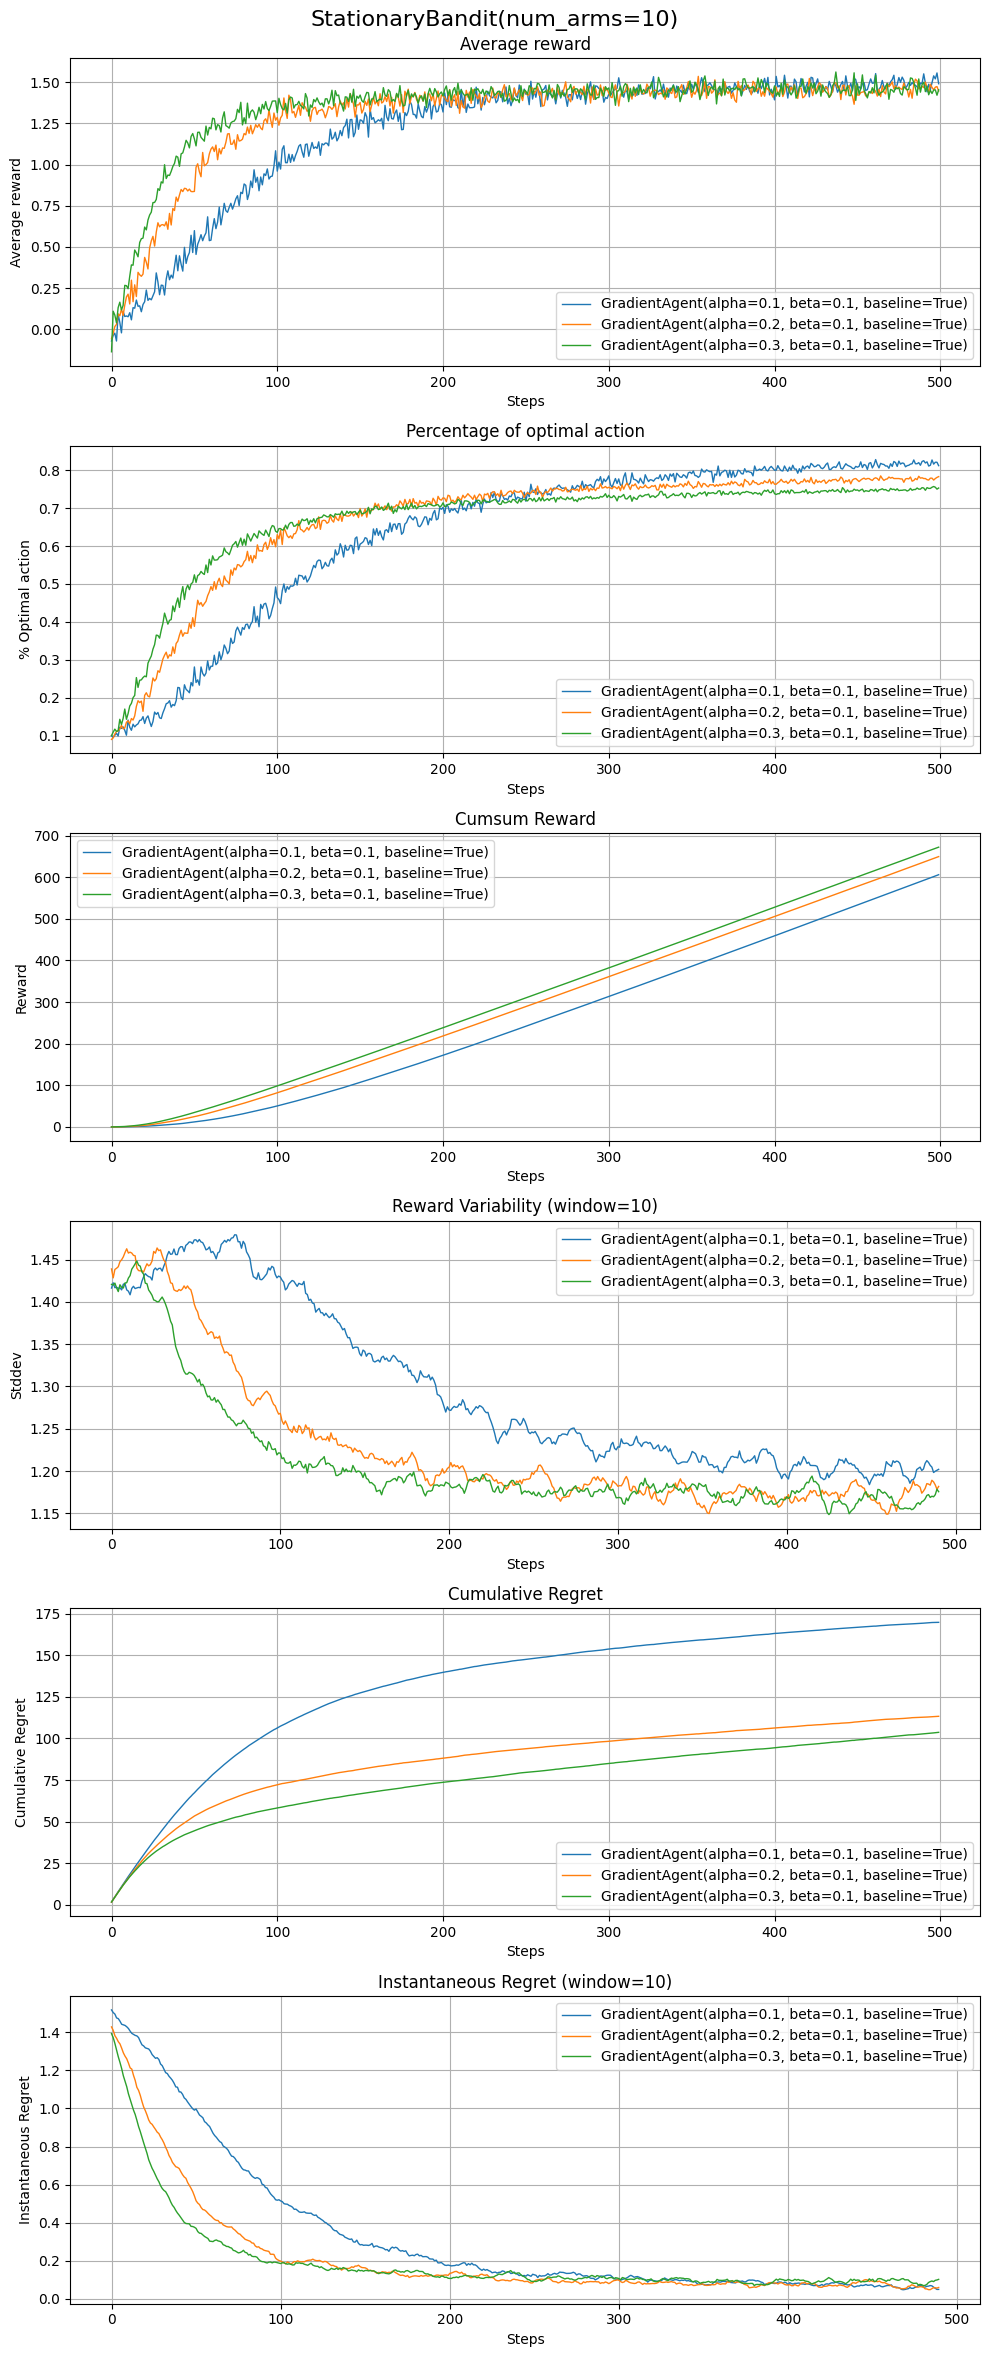

In [34]:
sim_configs = {
    'runs': 1000,
    'steps': 500,
    'arms': 10,
    'bandit': StationaryBandit,
    'bandit_args': {},
    'agents': [
        {
            'agent': GradientAgent,
            'args': {'alpha': .1, 'beta': .1}
        },
        {
            'agent': GradientAgent,
            'args': {'alpha': .2, 'beta': .1}
        },
        {
            'agent': GradientAgent,
            'args': {'alpha': .3, 'beta': .1}
        },
    ]
}

sim = Simulations(**sim_configs)
sim.run()
sim.visualise()

***

# Thompson Sampling for Multi-Armed Bandits

Thompson Sampling, also known as Bayesian Bandits, is a probabilistic algorithm for solving the Multi-Armed Bandit (MAB) problem. It balances exploration and exploitation by modeling the problem with a Bayesian approach, using distributions to represent the uncertainty in the expected reward of each arm. This method dynamically updates its beliefs about the arms' reward distributions as it gathers more data, making it highly effective in environments where the reward probabilities change over time.

## The Algorithm

Thompson Sampling uses a Bayesian framework to update the probability distribution of each arm's rewards based on observed outcomes. The algorithm selects arms based on the probability that an arm is optimal, leading to a natural balance between exploring uncertain arms and exploiting arms known to provide high rewards.

### Notation

- $x_a$: The number of successes (e.g., conversions, clicks) observed from arm $a$.
- $n_a$: The number of times arm $a$ has been tried.
- $\theta_a$: The true probability of success for arm $a$.

### Bayesian Modeling

Each arm's reward probability is modeled with a Beta distribution, a common choice for binary outcomes. The Beta distribution is parameterized by two parameters, $\alpha$ and $\beta$, which represent the number of successes and failures, respectively.

Initially, all arms are assumed to have a Beta distribution with parameters $\alpha_a = 1$ and $\beta_a = 1$ (a uniform prior, indicating initial ignorance about the arms' probabilities).

### Update Rule

After arm $a$ is selected and the reward (success or failure) is observed, the parameters of the Beta distribution for arm $a$ are updated:

- If the reward is a success, $\alpha_a$ is incremented by 1.
- If the reward is a failure, $\beta_a$ is incremented by 1.

### Arm Selection

At each time step, the algorithm samples from the Beta distribution of each arm to estimate its current probability of success. The arm with the highest sampled value is selected for play:

$$
a_t = \arg\max_a \text{Sample}(\text{Beta}(\alpha_a, \beta_a))
$$

## Explanation of the Algorithm

- **Exploration and Exploitation**: Thompson Sampling naturally balances exploration and exploitation by selecting arms based on their probability of being optimal. This leads to a more efficient exploration than methods that explore randomly or uniformly.
- **Adaptivity**: The use of Bayesian updating allows the algorithm to adapt to changes in the environment by updating its beliefs about each arm's reward probability in light of new evidence.
- **Efficiency**: Thompson Sampling is computationally efficient and has been shown to perform well in practice, especially in environments with high uncertainty.

## Conclusion

Thompson Sampling offers a powerful and efficient method for addressing the exploration-exploitation trade-off in the Multi-Armed Bandit problem. By leveraging probabilistic modeling and Bayesian inference, it dynamically adapts to the environment, making it particularly suitable for applications like PPC campaign optimization, where the reward distributions may change over time and decisions must be made under uncertainty.


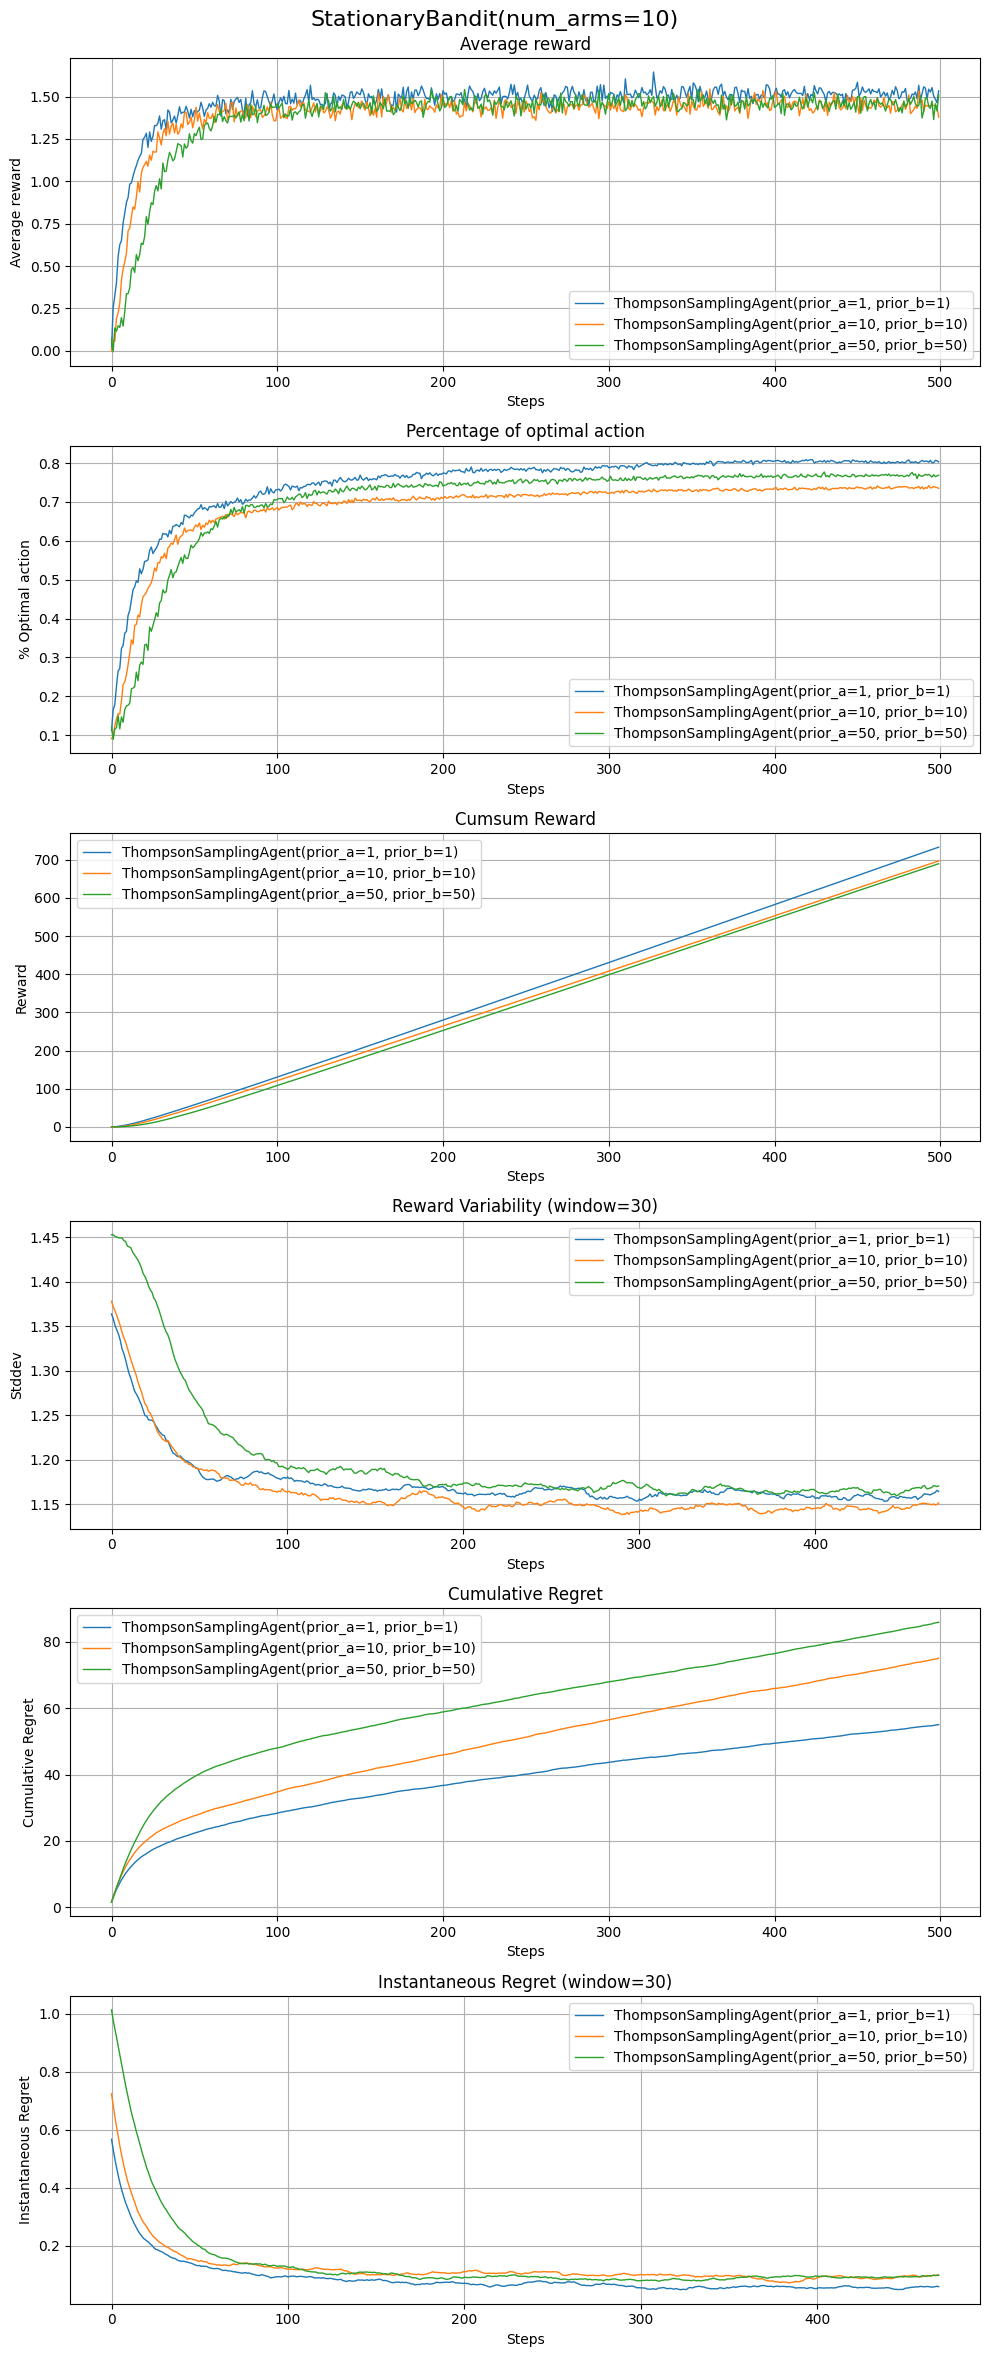

In [35]:
sim_configs = {
    'runs': 1000,
    'steps': 500,
    'arms': 10,
    'bandit': StationaryBandit,
    'bandit_args': {},
    'agents': [
        {
            'agent': ThompsonSamplingAgent,
            'args': {'prior_a': 1, 'prior_b': 1}
        },
        {
            'agent': ThompsonSamplingAgent,
            'args': {'prior_a': 10, 'prior_b': 10}
        },
        {
            'agent': ThompsonSamplingAgent,
            'args': {'prior_a': 50, 'prior_b': 50}
        },
    ]
}

sim = Simulations(**sim_configs)
sim.run()
sim.visualise(window=30)

***

# Sliding Window UCB

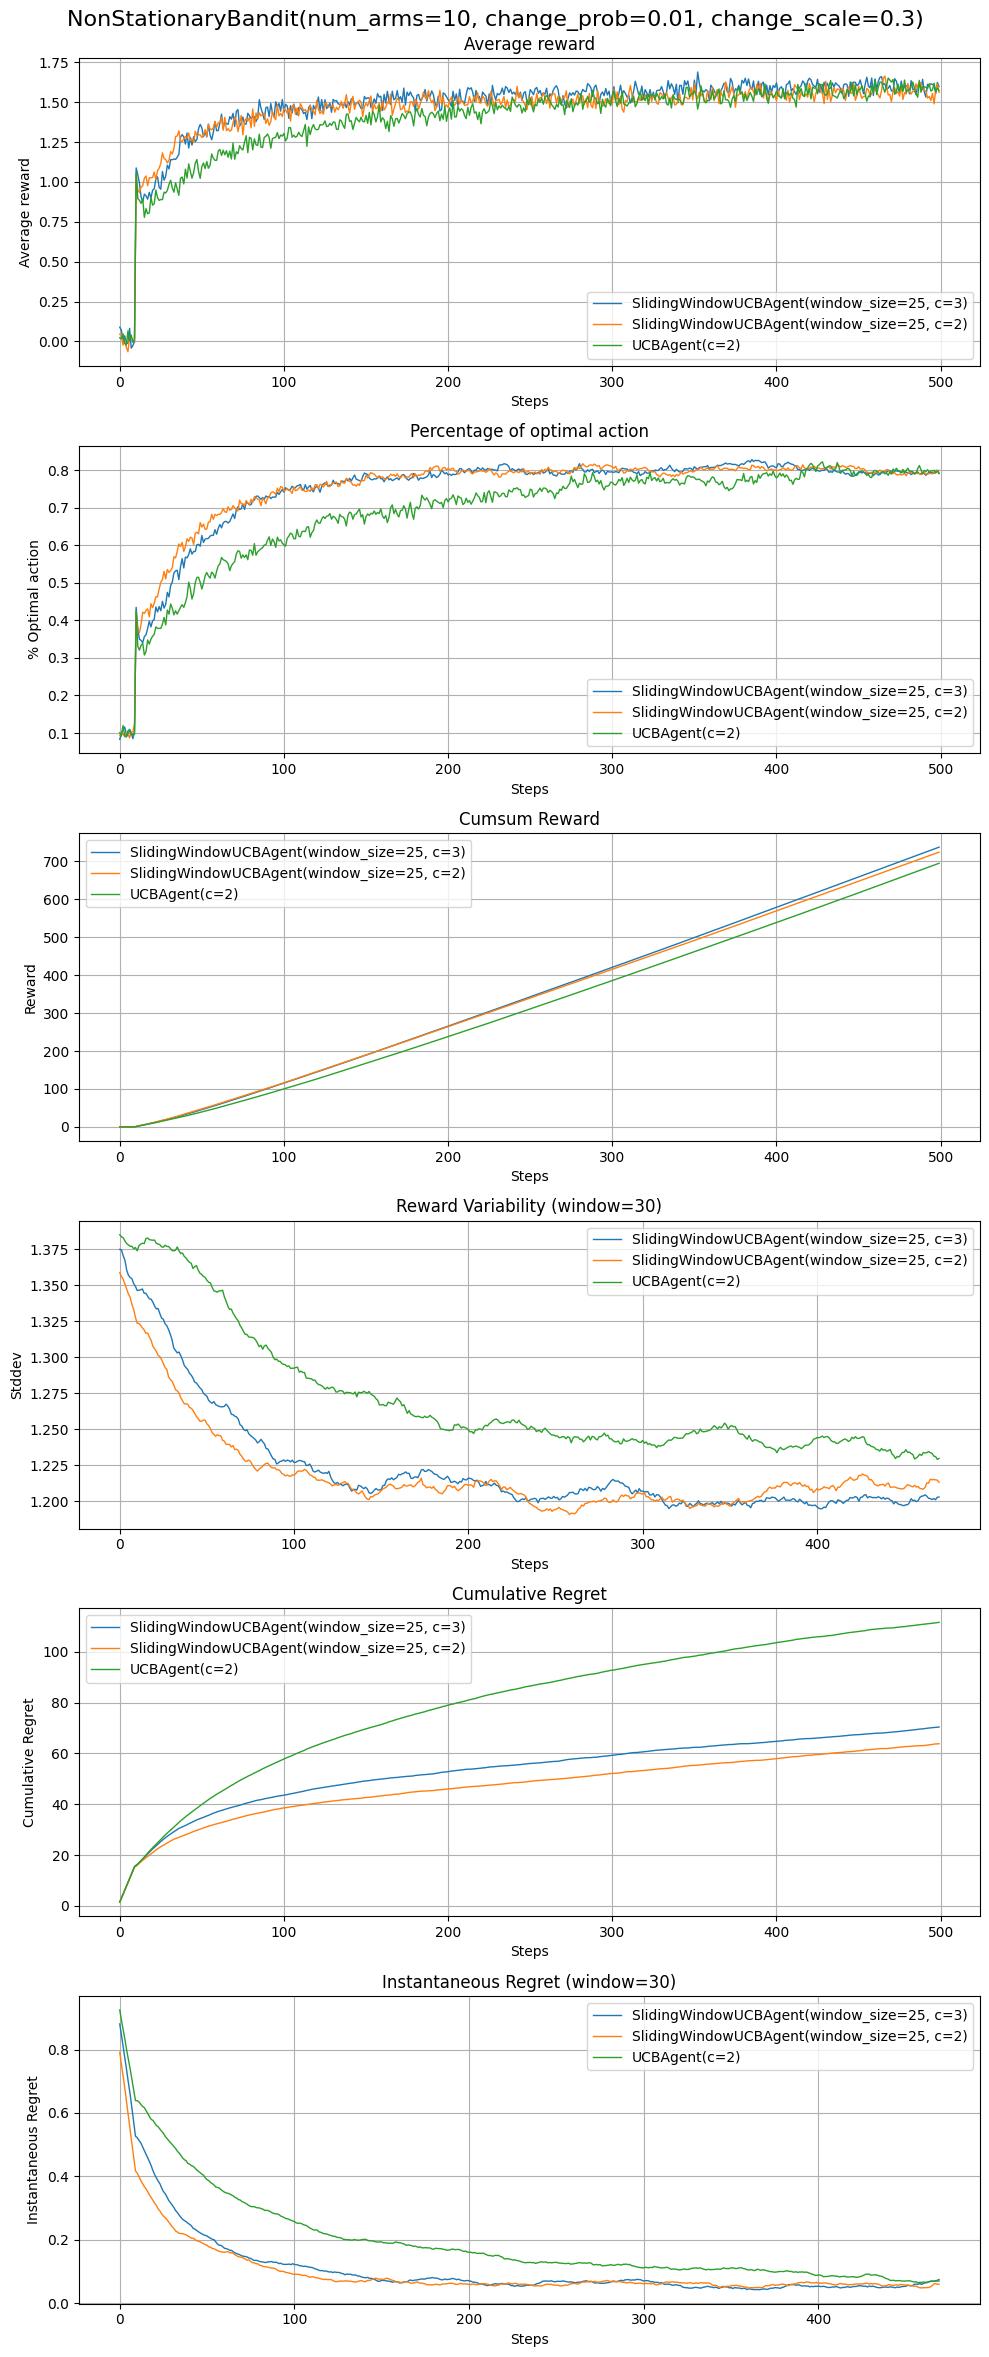

In [32]:
sim_configs = {
    'runs': 1000,
    'steps': 500,
    'arms': 10,
    'bandit': NonStationaryBandit,
    'bandit_args': {'change_prob': 0.01, 'change_scale': 0.3},
    'agents': [
        {
            'agent': SlidingWindowUCBAgent,
            'args': {'c': 3, 'window_size': 25}
        },
        {
            'agent': SlidingWindowUCBAgent,
            'args': {'c': 2, 'window_size': 25}
        },
        {
            'agent': UCBAgent,
            'args': {'c': 2}
        },

    ]
}

sim = Simulations(**sim_configs)
sim.run()
sim.visualise(window=30)

# EXP3 Algorithm for Multi-Armed Bandits

The EXP3 (Exponential-weight algorithm for Exploration and Exploitation) algorithm is a strategy designed for the Multi-Armed Bandit (MAB) problem, particularly in adversarial settings. Unlike stochastic bandit algorithms that assume fixed reward distributions, EXP3 is designed to perform well in environments where an adversary may be manipulating the rewards.

## Overview

EXP3 balances exploration and exploitation by assigning weights to each arm and updating these weights based on the observed rewards, using a probability distribution that favors arms with higher weights. This method allows for effective learning even when the reward distributions are non-stationary or adversarial.

### Algorithm Steps

1. **Initialization**: Start with all arms having equal weights.
2. **Selection**: At each time step, select an arm based on a probability distribution derived from the current weights.
3. **Update**: After receiving the reward, update the weight of the selected arm based on the observed reward.

### Key Notations

- $K$: The total number of arms.
- $w_{t}(a)$: The weight of arm $a$ at time $t$.
- $p_{t}(a)$: The probability of selecting arm $a$ at time $t$.
- $\eta$: The learning rate, a parameter that controls the rate of learning.

### Equations and Explanations

#### Initialization

Initially, set all arm weights equal, usually to 1:

$$
w_{1}(a) = 1, \quad \forall a \in \{1, \ldots, K\}
$$

#### Probability Distribution

At each time step $t$, compute the probability of selecting each arm using the softmax function:

$$
p_{t}(a) = \frac{w_{t}(a)}{\sum_{j=1}^{K} w_{t}(j)}
$$

This ensures that arms with higher weights have a higher probability of being selected, balancing exploration and exploitation.

#### Reward Estimation

Upon selecting an arm $a$ and observing a reward $r_t$, estimate the reward for all arms as follows:

$$
\hat{r}_{t}(a) = \frac{r_{t}(a)}{p_{t}(a)} \cdot \mathbb{1}(a_t = a)
$$

where $\mathbb{1}(a_t = a)$ is an indicator function that is 1 if arm $a$ was selected at time $t$, and 0 otherwise. This estimation adjusts the observed reward by the probability of selection, compensating for the exploration factor in the reward.

#### Weight Update

Update the weight of each arm using the estimated reward:

$$
w_{t+1}(a) = w_{t}(a) \exp\left(\eta \hat{r}_{t}(a)\right)
$$

This exponential update rule ensures that arms which receive higher estimated rewards get their weights increased more rapidly, allowing the algorithm to adapt to changing environments.

## Conclusion

EXP3 is a powerful algorithm for the adversarial bandit problem, providing a robust mechanism for balancing exploration and exploitation in uncertain and potentially adversarial environments. Its probabilistic approach to arm selection and adaptive weight updates make it suitable for a wide range of applications, from online advertising to financial portfolio selection.



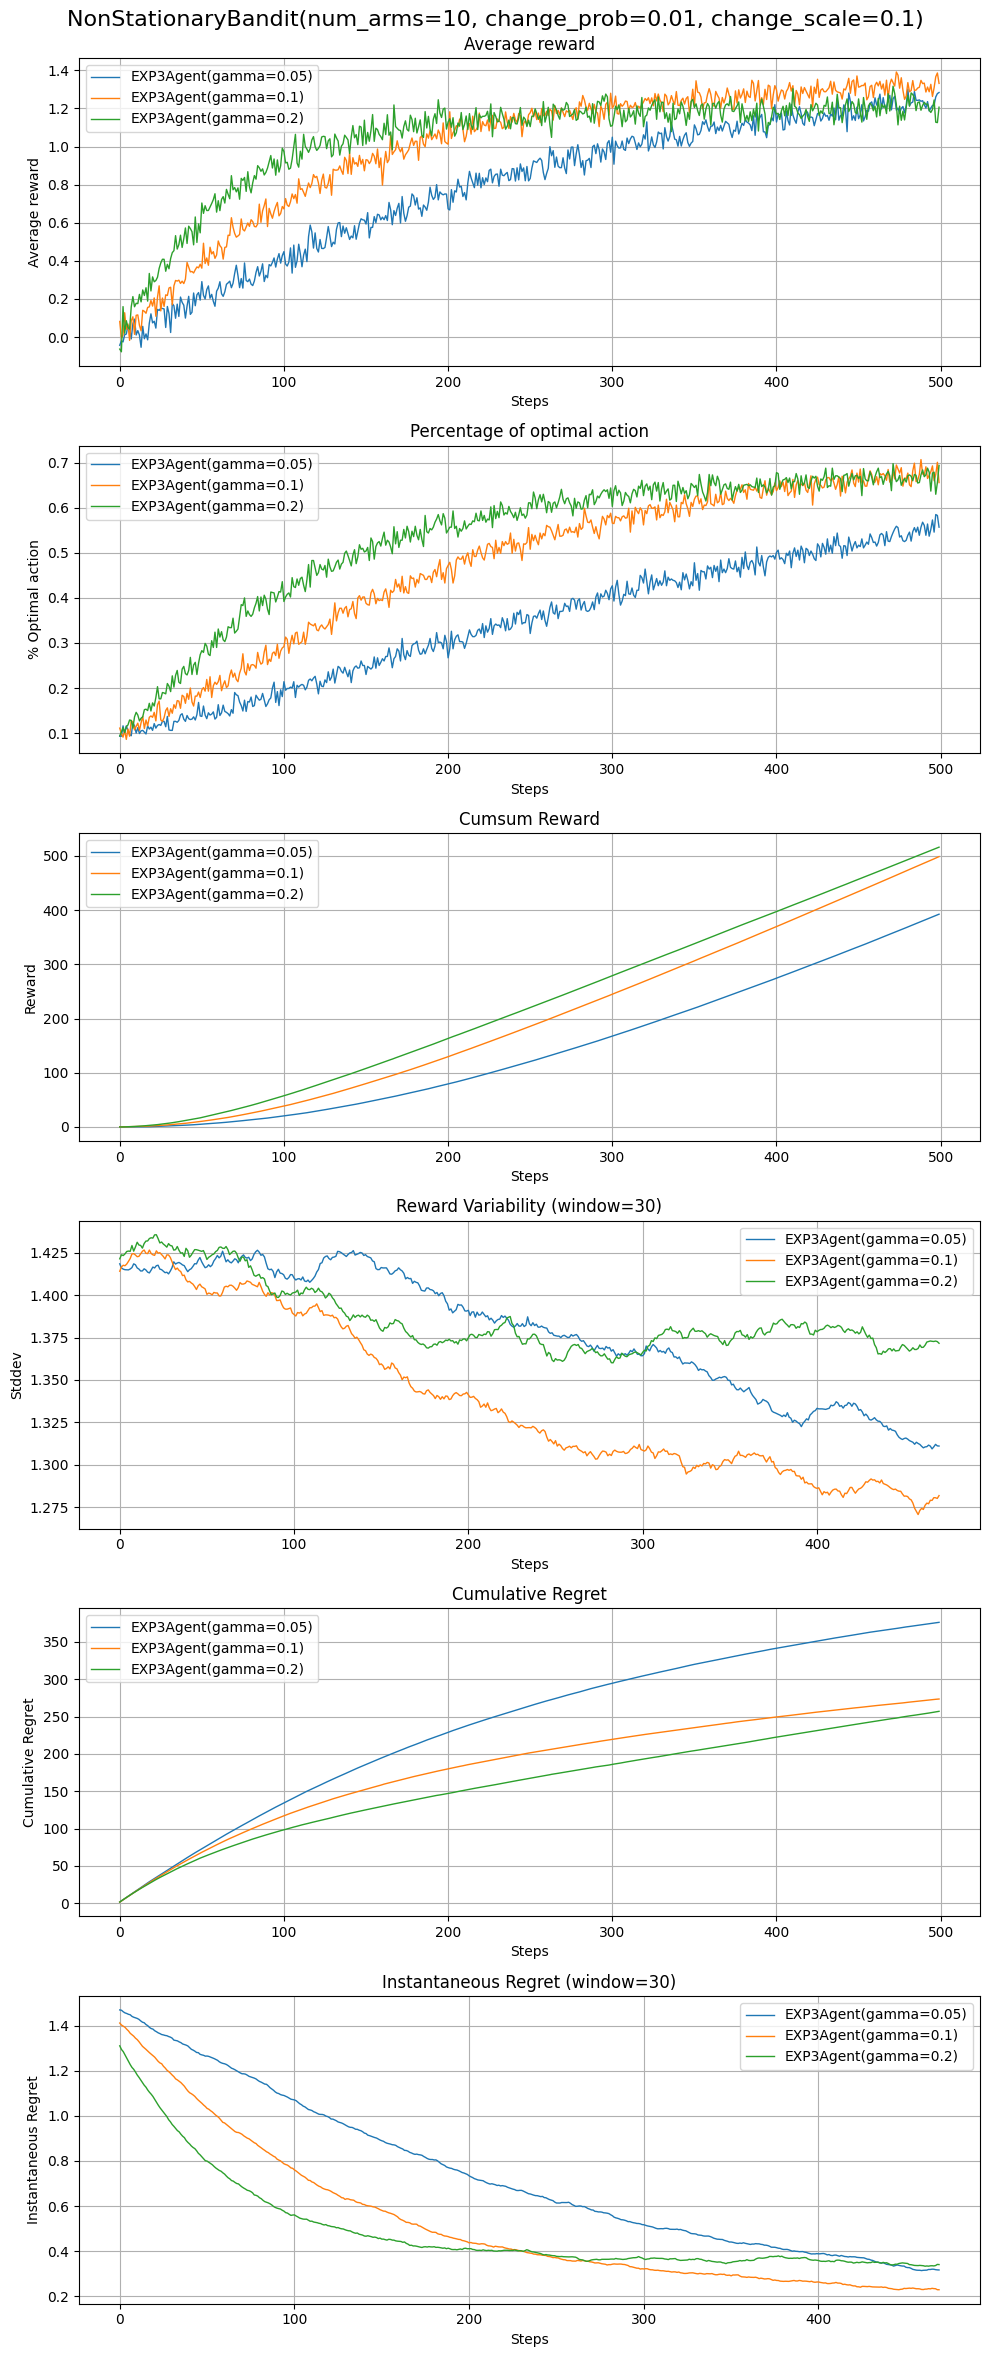

In [36]:
sim_configs = {
    'runs': 1000,
    'steps': 500,
    'arms': 10,
    'bandit': NonStationaryBandit,
    'bandit_args': {'change_prob': 0.01, 'change_scale': .1},
    'agents': [
        {
            'agent': EXP3Agent,
            'args': {'gamma': .05}
        },
        {
            'agent': EXP3Agent,
            'args': {'gamma': .1}
        },
        {
            'agent': EXP3Agent,
            'args': {'gamma': .2}
        },

    ]
}

sim = Simulations(**sim_configs)
sim.run()
sim.visualise(window=30)